In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

#Setting the parameters
NGRAMS = 2
EPOCHS = 15

# Reading in the Harvard data. NEW!!
io = '/Users/ozaltun/Documents/GitHub/ethnicolr/ethnicolr/data/harvard/firstnames.xlsx'
datadesc = pd.read_excel(io, sheet_name=0, header=0)
df = pd.read_excel(io, sheet_name=1, header=0)
# Dropping the "All other names" row. NEW!!
df = df.drop(4250)
df

,firstname,obs,pcthispanic,pctwhite,pctblack,pctapi,pctaian,pct2prace
0,AARON,3646,2.880,91.607,3.264,2.057,0.055,0.137
1,ABBAS,59,0.000,71.186,3.390,25.424,0.000,0.000
2,ABBEY,57,0.000,96.491,3.509,0.000,0.000,0.000
3,ABBIE,74,1.351,95.946,2.703,0.000,0.000,0.000
4,ABBY,262,1.527,94.656,1.527,2.290,0.000,0.000
5,ABDUL,221,0.452,44.344,6.787,47.511,0.452,0.452
6,ABDULLAH,44,2.273,65.909,9.091,22.727,0.000,0.000
7,ABE,31,6.452,77.419,12.903,3.226,0.000,0.000
8,ABEL,327,82.569,12.844,2.141,2.446,0.000,0.000
9,ABELARDO,76,78.947,9.211,0.000,11.842,0.000,0.000


## Resampling with weight

In [2]:
sdf = df.sample(400000, weights=df['obs'], replace=True)

In [3]:
sdf = sdf.dropna()

## Assign race by pertcentage

In [4]:
from numpy.random import choice

races = ['white', 'black', 'api', 'aian', 'prace','hispanic']

def to_race(c):
    w = np.array(c).astype(float)
    probs = w/w.sum()
    return choice(races, p=probs)

sdf['race'] = sdf[['pctwhite', 'pctblack', 'pctapi', 'pctaian', 'pct2prace','pcthispanic']].apply(lambda c: to_race(c), axis=1)
sdf

,firstname,obs,pcthispanic,pctwhite,pctblack,pctapi,pctaian,pct2prace,race
1910,JOANN,1852,2.916,89.849,4.698,1.998,0.216,0.324,white
4,ABBY,262,1.527,94.656,1.527,2.290,0.000,0.000,white
1892,JIAN,267,0.000,0.375,0.000,99.625,0.000,0.000,api
3327,ROBERT,48260,2.138,94.511,2.161,0.924,0.128,0.137,white
2936,NEIL,1476,1.152,94.783,1.016,2.778,0.136,0.136,hispanic
693,CHERYL,5915,0.659,92.764,5.224,1.099,0.085,0.169,white
4069,VIRGINIA,3057,9.585,83.775,3.664,2.650,0.131,0.196,white
2684,MARY,23598,2.509,92.351,3.327,1.526,0.174,0.114,white
2926,NAVEEN,59,5.085,25.424,0.000,69.492,0.000,0.000,api
671,CHARLES,16262,1.230,91.379,5.547,1.494,0.160,0.191,white


## Check the correctness of race assignment

In [5]:
df[df.firstname == 'FRANCIS']

,firstname,obs,pcthispanic,pctwhite,pctblack,pctapi,pctaian,pct2prace
1343,FRANCIS,2114,2.271,88.269,3.075,6.197,0.095,0.095


In [6]:
# Additional features
sdf['name_first'] = sdf.firstname.str.title()
sdf.groupby('race').agg({'name_first': 'count'})

,name_first
race,
aian,568
api,17353
black,14319
hispanic,27133
prace,558
white,340069


In [7]:
len(sdf)

400000

## Preprocessing the input data

In [8]:
# only first name in Harvard data
sdf['name_last_name_first'] = sdf['name_first']

# build n-gram list
vect = CountVectorizer(analyzer='char', max_df=0.3, min_df=3, ngram_range=(NGRAMS, NGRAMS), lowercase=False) 
#vect = CountVectorizer(analyzer='char', ngram_range=(2, 2), lowercase=False) 
a = vect.fit_transform(sdf.name_last_name_first)
vocab = vect.vocabulary_
len(vocab)

634

In [9]:
import operator
sorted_vocab = sorted(vocab.items(), key=operator.itemgetter(1))
cols = list(map(operator.itemgetter(0), sorted_vocab))

In [10]:
count_df = pd.DataFrame(a.todense(), columns=cols)
count_df

,Aa,Ab,Ad,Af,Ag,Ah,Ai,Aj,Ak,Al,...,ze,zh,zi,zk,zl,zo,zr,zt,zu,zy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
count_df.sum().sort_values(ascending=False).describe()

count      634.000000
mean      3032.889590
std       6227.601908
min          3.000000
25%         54.500000
50%        463.500000
75%       3042.000000
max      57027.000000
dtype: float64

In [12]:
pd.set_option('display.max_rows', 20)
count_df.sum().sort_values(ascending=False)

ar    57027
an    50397
er    39756
ri    35870
en    33808
el    32494
ic    32159
ha    27614
th    25920
in    25132
      ...  
dz        3
cz        3
Ih        3
Fu        3
vr        3
Dz        3
Sn        3
qi        3
Ax        3
Zd        3
Length: 634, dtype: int64

In [13]:
# sort n-gram by freq (highest -> lowest)
words = []
for b in vocab:
    c = vocab[b]
    #print(b, c, a[:, c].sum())
    words.append((a[:, c].sum(), b))
    #break
words = sorted(words, reverse=True)
words_list = [w[1] for w in words]
num_words = len(words_list)
print("num_words = %d" % num_words)

num_words = 634


In [14]:
def find_ngrams(text, n):
    a = zip(*[text[i:] for i in range(n)])
    wi = []
    for i in a:
        w = ''.join(i)
        try:
            idx = words_list.index(w)
        except:
            idx = 0
        wi.append(idx)
    return wi

# build X from index of n-gram sequence
X = np.array(sdf.name_last_name_first.apply(lambda c: find_ngrams(c, NGRAMS)))

# check max/avg feature
X_len = []
for x in X:
    X_len.append(len(x))

max_feature_len = max(X_len)
avg_feature_len = int(np.mean(X_len))

print("Max feature len = %d, Avg. feature len = %d" % (max_feature_len, avg_feature_len))
y = np.array(sdf.race.astype('category').cat.codes)

# Split train and test dataset
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

Max feature len = 11, Avg. feature len = 4


In [15]:
# Split train and test for inhouse sampling accuracy. NEW!!
train_names, test_names = train_test_split(sdf.name_last_name_first.to_numpy(),
                                           test_size=0.2, random_state=21, stratify=y)

train_indexes, test_indexes = train_test_split(sdf.index.values,
                                           test_size=0.2, random_state=21, stratify=y)

## Train a LSTM model

ref: http://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

In [16]:
'''The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
Notes:

- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.

- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Activation
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import load_model

max_features = num_words # 20000
feature_len = 20 # avg_feature_len # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=feature_len)
X_test = sequence.pad_sequences(X_test, maxlen=feature_len)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


320000 train sequences
80000 test sequences
Pad sequences (samples x time)
X_train shape: (320000, 20)
X_test shape: (80000, 20)
6 classes
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (320000, 6)
y_test shape: (80000, 6)


In [17]:
print('Build model...')

model = Sequential()
model.add(Embedding(num_words, 32, input_length=feature_len))
model.add(LSTM(128, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(num_classes, activation='softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Build model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 32)            20288     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               82432     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
Total params: 103,494
Trainable params: 103,494
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
print('Train...')
model.fit(X_train, y_train, batch_size=batch_size, epochs=20,
          validation_split=0.1, verbose=2)
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size, verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Instructions for updating:
Use tf.cast instead.
Train on 288000 samples, validate on 32000 samples
Epoch 1/20
 - 157s - loss: 0.4683 - acc: 0.8784 - val_loss: 0.4315 - val_acc: 0.8877
Epoch 2/20
 - 156s - loss: 0.4360 - acc: 0.8867 - val_loss: 0.4208 - val_acc: 0.8910
Epoch 3/20
 - 157s - loss: 0.4256 - acc: 0.8895 - val_loss: 0.4126 - val_acc: 0.8925
Epoch 4/20
 - 156s - loss: 0.4192 - acc: 0.8912 - val_loss: 0.4102 - val_acc: 0.8951
Epoch 5/20
 - 156s - loss: 0.4149 - acc: 0.8926 - val_loss: 0.4060 - val_acc: 0.8958
Epoch 6/20
 - 155s - loss: 0.4117 - acc: 0.8932 - val_loss: 0.4032 - val_acc: 0.8965
Epoch 7/20
 - 156s - loss: 0.4089 - acc: 0.8937 - val_loss: 0.4031 - val_acc: 0.8974
Epoch 8/20
 - 156s - loss: 0.4069 - acc: 0.8944 - val_loss: 0.4015 - val_acc: 0.8979
Epoch 9/20
 - 156s - loss: 0.4052 - acc: 0.8946 - val_loss: 0.4012 - val_acc: 0.8980
Epoch 10/20
 - 155s - loss: 0.4039 - acc: 0.8950 - val_loss: 0.3996 - val_acc: 0.8977
Epoch 11/20
 - 156s - loss: 0.4029 - acc:

### Inhouse accuracy measure. NEW!!

In [19]:
sdf_subsample = sdf.sample(n=40000, random_state=2) #0.2
# sdf_subsample = sdf.loc[test_indexes]

X_inhouse_test = np.array(sdf_subsample.name_last_name_first.apply(lambda c: find_ngrams(c, NGRAMS)))
X_inhouse_test = sequence.pad_sequences(X_inhouse_test, maxlen=feature_len)
y_inhouse_predicted = pd.DataFrame(model.predict(X_inhouse_test), columns = [ 'pctaian_predict','pctapi_predict',
                                                                             'pctblack_predict','pcthispanic_predict', 
                                                                             'pct2prace_predict','pctwhite_predict'])

y_inhouse = sdf_subsample[[ 'pctaian','pctapi',  'pctblack','pcthispanic', 'pct2prace','pctwhite']]
y_inhouse = y_inhouse.apply(lambda x: round(x/100, 2))

y_inhouse_predicted = y_inhouse_predicted.set_index(y_inhouse.index)

inhouse = pd.concat([y_inhouse, y_inhouse_predicted], axis=1, join_axes=[y_inhouse_predicted.index])

In [20]:
from numpy.random import choice


def sampling_accuracy_4_one(row):
    """Given a row of true percentages and predicted percentages, draw 100 samples from both 
        empirical distributions and compare how many times they match!"""
    
    true = row[[ 'pctaian','pctapi',  'pctblack','pcthispanic', 'pct2prace','pctwhite']].to_numpy()
    predicted = row[['pctaian_predict','pctapi_predict','pctblack_predict','pcthispanic_predict','pct2prace_predict','pctwhite_predict']].to_numpy()
    true= np.array(true).astype(float)
    probs_true = true/true.sum()
    
    predicted= np.array(predicted).astype(float)
    probs_predicted = predicted/predicted.sum()

    draws_true = choice(6, 100, p = probs_true)
    draws_predicted = choice(6, 100, p = probs_predicted)
    
    return (draws_true == draws_predicted).sum()/100
 

In [21]:
inhouse['inhouse_acc'] = inhouse.apply(lambda row: sampling_accuracy_4_one(row), axis=1)

In [22]:
inhouse['inhouse_acc'].mean()

0.8205044999999774

## Confusion Matrix

In [23]:
y_pred = model.predict_classes(X_test, verbose=2)
p = model.predict_proba(X_test, verbose=2) # to predict probability
target_names = list(sdf.race.astype('category').cat.categories)
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

             precision    recall  f1-score   support

       aian       0.00      0.00      0.00       113
        api       0.82      0.39      0.53      3471
      black       0.52      0.05      0.09      2864
   hispanic       0.74      0.59      0.66      5426
      prace       0.00      0.00      0.00       112
      white       0.91      0.98      0.94     68014

avg / total       0.88      0.89      0.87     80000

[[    0    10     0     1     0   102]
 [    0  1371    13   216     0  1871]
 [    0    30   141    82     0  2611]
 [    0    28    15  3205     0  2178]
 [    0     5     1     1     0   105]
 [    0   221   103   815     0 66875]]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


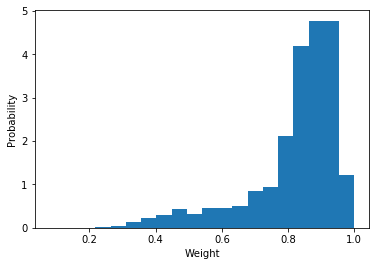

In [30]:
import matplotlib.pyplot as plot
 

plot.hist(inhouse['inhouse_acc'].to_list(),density=1, bins=20) 
#plot.axis([50, 110, 0, 0.06]) 
#axis([xmin,xmax,ymin,ymax])
plot.xlabel('Weight')
plot.ylabel('Probability')
plot.show()

In [54]:
y_test_2 = sdf[[ 'pctaian','pctapi',  'pctblack','pcthispanic', 'pct2prace','pctwhite']]
X = sequence.pad_sequences(X, maxlen=feature_len)
predicted = pd.DataFrame(model.predict(X), columns = [ 'pctaian_predict','pctapi_predict',  'pctblack_predict','pcthispanic_predict', 'pct2prace_predict','pctwhite_predict'])

predicted_head = predicted.head(1000)
actual_head =y_test_2.head(1000)

predicted_head = predicted_head.apply(lambda x: round(x, 2))
actual_head = actual_head.apply(lambda x: round(x/100, 2))

predicted_head = predicted_head.set_index(actual_head.index)

head = pd.concat([actual_head, predicted_head], axis=1, join_axes=[actual_head.index])
head.to_excel('top_100_pred_actual.xlsx')